In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from xgboost import XGBClassifier
import dalex as dx
from yellowbrick.classifier import DiscriminationThreshold
from imblearn.over_sampling import SMOTE

from unified_functions import get_model_pipeline, train_and_evaluate_model, tune_hyperparameters, plot_roc, plot_confusion_matrix, plot_discrimination_threshold, plot_feature_importances

In [2]:
df = pd.read_csv('../materials/processed_df.csv')
df.head()

,ID,wiek,PSA,PSAdensity,MRI vol,MRI Pirads,MRI EPE (naciek poza torebke),MRI EPE L,MRI EPE P,MRI SVI (pecherzyki),MRI SVI L,MRI SVI P,MRI SIZE,Bx ISUP Grade P,Bx ISUP Grade L,ISUP RP,ISUP RP P,ISUP RP L,SM +,N +,EPE RP,EPE L RP,EPE P RP,SVI RP,SVI RP L,SVI RP P,TNM,EPE micro,EPE macro,EPE false_positive,Bx ISUP Grade
0,ID00000,63.0,5.11,0.146000,35.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,10.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2,0.0,0.0,1.0,1.0
1,ID00008,64.0,5.39,0.179667,30.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,3.0,3.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,t3a,1.0,0.0,0.0,3.0
2,ID00049,64.0,8.30,0.207500,40.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2c,0.0,0.0,0.0,1.0
3,ID00001,56.0,6.80,0.200000,34.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,2.0,0.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pt2c,0.0,0.0,0.0,2.0
4,ID00002,59.0,40.00,2.222222,18.0,5.0,1.0,1.0,0.0,1.0,1.0,0.0,18.0,1.0,2.0,5.0,4.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,t3a,0.0,1.0,0.0,2.0


In [3]:
numerical_cols = ['wiek', 'PSA', 'PSAdensity', 'MRI vol', 'MRI SIZE']
categorical_cols = ['MRI EPE (naciek poza torebke)', 'MRI Pirads', 'MRI EPE L', 'MRI EPE P', 'MRI SVI (pecherzyki)', 'MRI SVI L', 'MRI SVI P','Bx ISUP Grade P', 'Bx ISUP Grade L', 'Bx ISUP Grade']

# micro EPE results

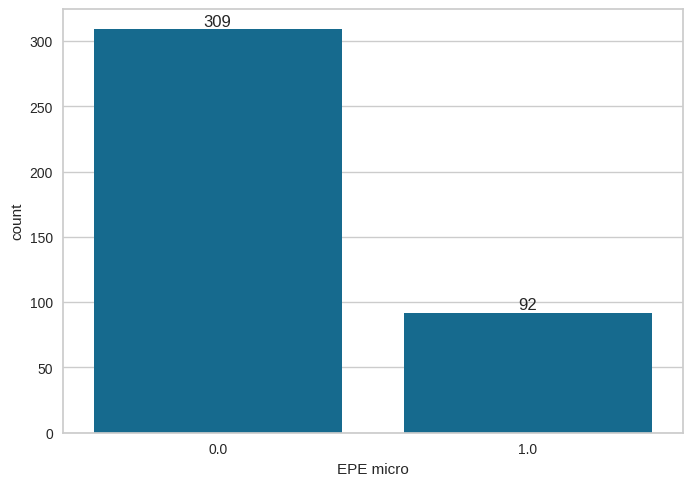

In [4]:
ax = sns.countplot(x='EPE micro', data=df)
ax.bar_label(ax.containers[0])
plt.show()

Tuning hyperparameters...



Best hyperparameters: {'classifier__colsample_bytree': 0.9, 'classifier__gamma': 0.1, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}
Best neg_brier_score score: -0.19075102142597958

Model hyperparameters after tuning: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.9, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': 0.1, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_jobs': None, 'num_paral

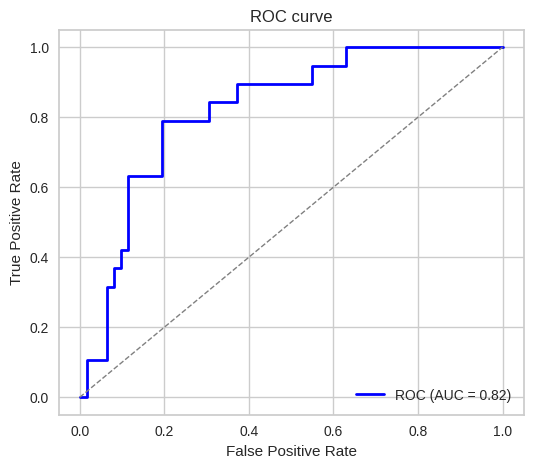

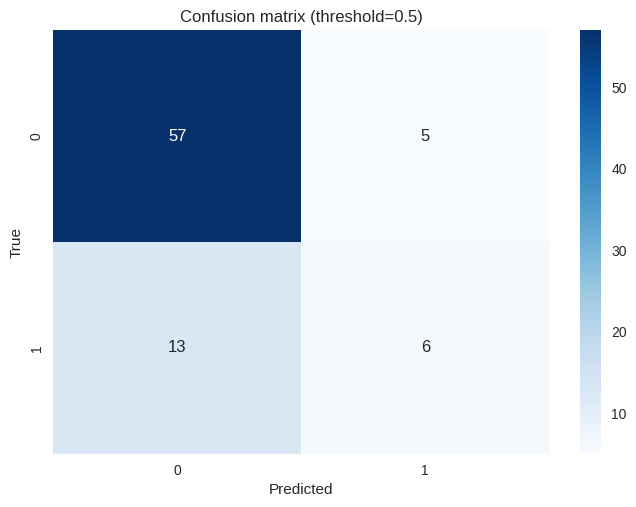

Sensitivity: 0.3158
Specificity: 0.9194
Accuracy: 0.7778%
Preparation of a new explainer is initiated

  -> data              : 401 rows 15 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 401 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x793ab55c1e40> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.00395, mean = 0.229, max = 0.895
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.836, mean = 0.000652, max = 0.916
  -> model_info        : package sklearn

A new explainer has been created!


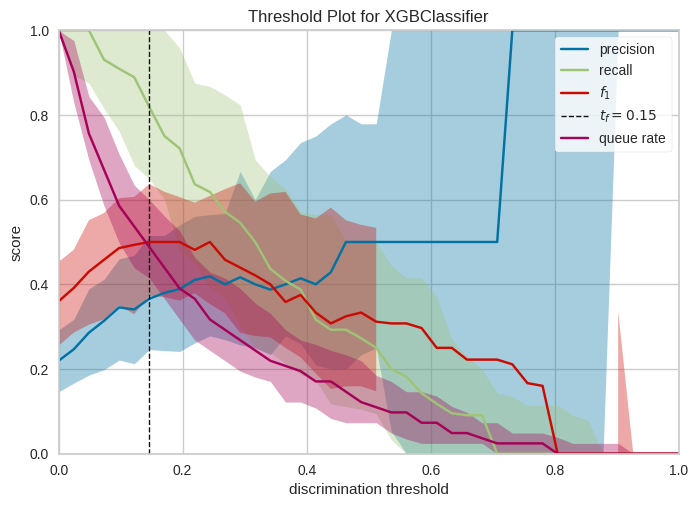

In [5]:
X = df[numerical_cols + categorical_cols]
y = df['EPE micro']

param_grid = {
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__n_estimators': [200, 400, 800],
    'classifier__max_depth': [3, 6, 9],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0],
    'classifier__gamma': [0, 0.1, 0.2]
}

model = XGBClassifier(random_state=2)
#brier score and tuning test split = 0.2
y_true, y_pred, y_pred_probs, false_positive_rate, true_positive_rate, total_roc_auc, trained_model, best_params = train_and_evaluate_model(model, X, y, numerical_cols, categorical_cols, n_folds=5, tune_params=True, param_grid=param_grid, tuning_scoring='neg_brier_score', tuning_test_size=0.2)
untrained_model = model.set_params(**best_params)

plot_roc(false_positive_rate, true_positive_rate, total_roc_auc)
plot_confusion_matrix(y_true, y_pred)
plot_feature_importances(trained_model, X, y)
plot_discrimination_threshold(untrained_model, X, y)

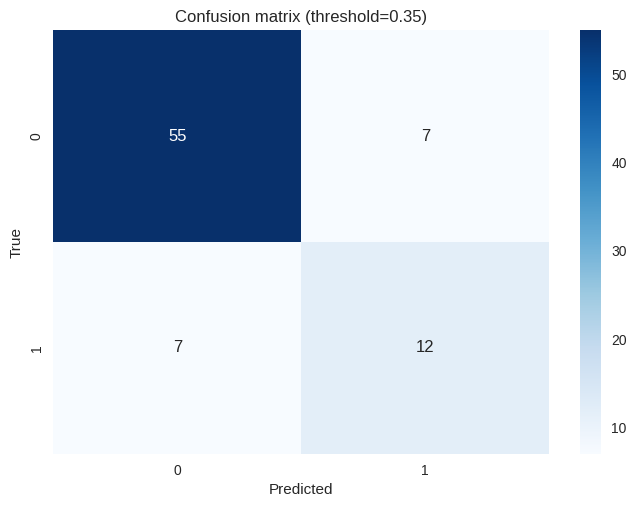

Sensitivity: 0.6316
Specificity: 0.8871
Accuracy: 0.8272%


In [7]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.35)

# Macro EPE results

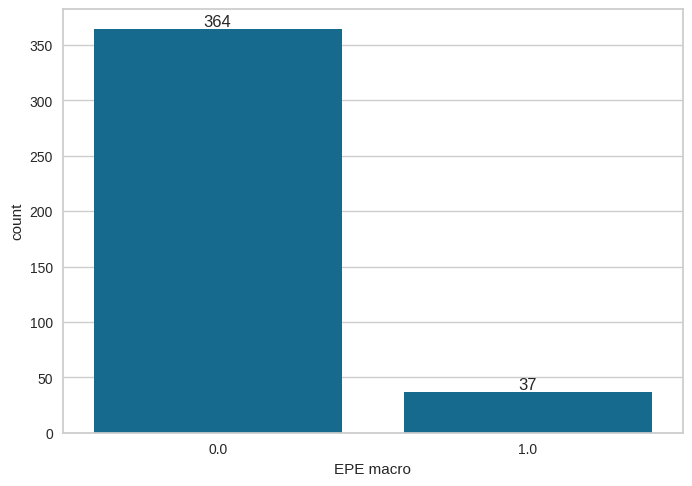

In [8]:
ax = sns.countplot(x='EPE macro', data=df)
ax.bar_label(ax.containers[0])
plt.show()

Tuning hyperparameters...



Best hyperparameters: {'classifier__colsample_bytree': 0.8, 'classifier__gamma': 0.2, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 6, 'classifier__n_estimators': 800, 'classifier__subsample': 1.0}
Best neg_brier_score score: -0.03075725303088384

Model hyperparameters after tuning: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': 0.2, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 800, 'n_jobs': None, 'num_paral

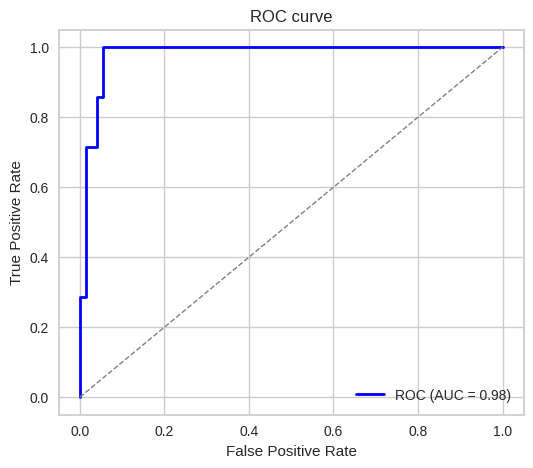

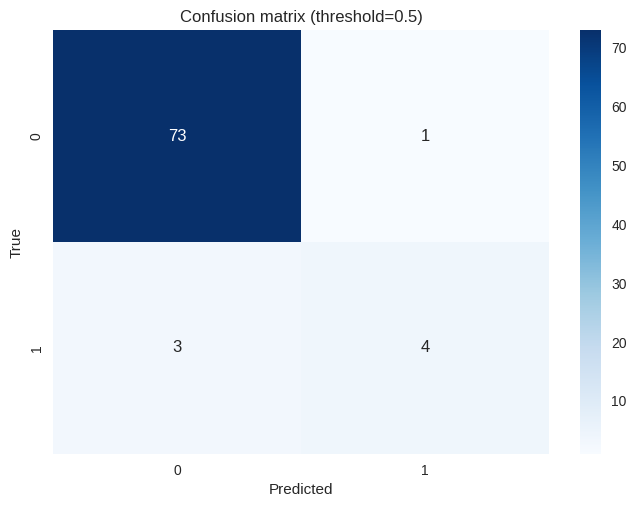

Sensitivity: 0.5714
Specificity: 0.9865
Accuracy: 0.9506%
Preparation of a new explainer is initiated

  -> data              : 401 rows 15 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 401 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x793ab55c1e40> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.00162, mean = 0.0874, max = 0.982
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.878, mean = 0.00487, max = 0.962
  -> model_info        : package sklearn

A new explainer has been created!


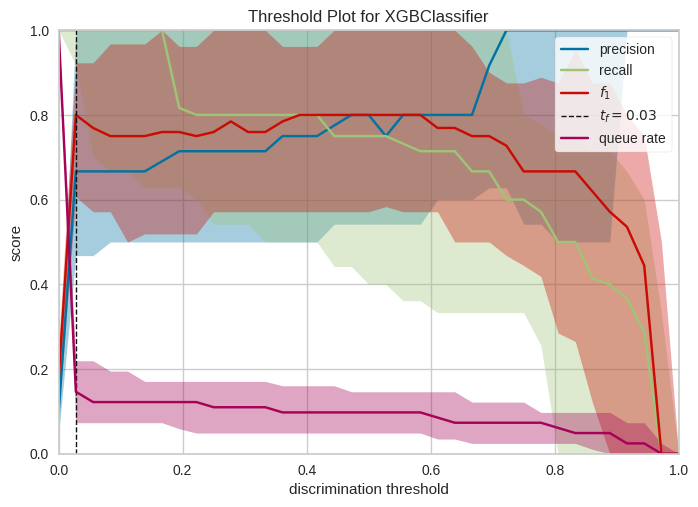

In [9]:
X = df[numerical_cols + categorical_cols]
y = df['EPE macro']

param_grid = {
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__n_estimators': [200, 400, 800],
    'classifier__max_depth': [3, 6, 9],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0],
    'classifier__gamma': [0, 0.1, 0.2]
}

model = XGBClassifier(random_state=2)

#brier score and tuning test split = 0.2
y_true, y_pred, y_pred_probs, false_positive_rate, true_positive_rate, total_roc_auc, trained_model, best_params = train_and_evaluate_model(model, X, y, numerical_cols, categorical_cols, n_folds=5, tune_params=True, param_grid=param_grid, tuning_scoring='neg_brier_score', tuning_test_size=0.2)
untrained_model = model.set_params(**best_params)

plot_roc(false_positive_rate, true_positive_rate, total_roc_auc)
plot_confusion_matrix(y_true, y_pred)
plot_feature_importances(trained_model, X, y)
plot_discrimination_threshold(untrained_model, X, y)

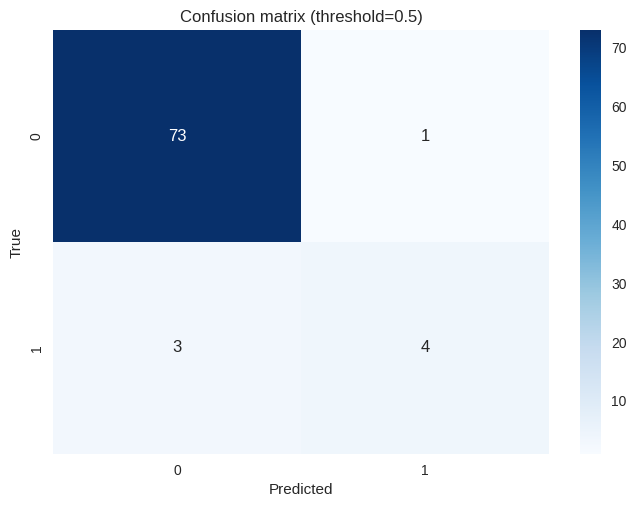

Sensitivity: 0.5714
Specificity: 0.9865
Accuracy: 0.9506%


In [13]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.5)

# EPE RP

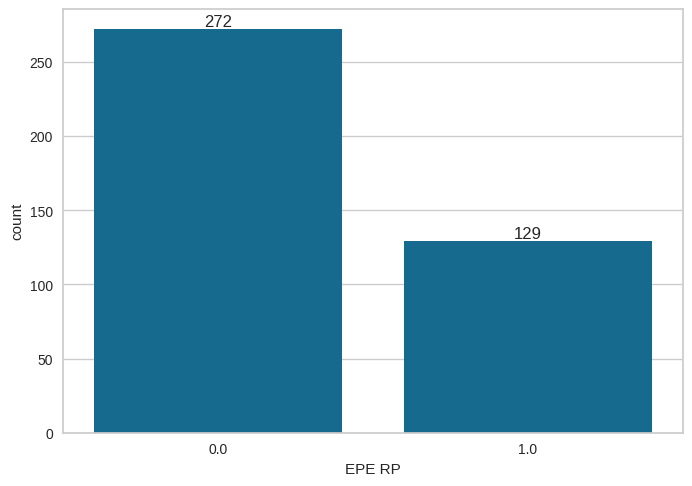

In [14]:
ax = sns.countplot(x='EPE RP', data=df)
ax.bar_label(ax.containers[0])
plt.show()

Tuning hyperparameters...



Best hyperparameters: {'classifier__colsample_bytree': 1.0, 'classifier__gamma': 0.2, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}
Best neg_brier_score score: -0.19383597330208302

Model hyperparameters after tuning: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1.0, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': 0.2, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_jobs': None, 'num_paral

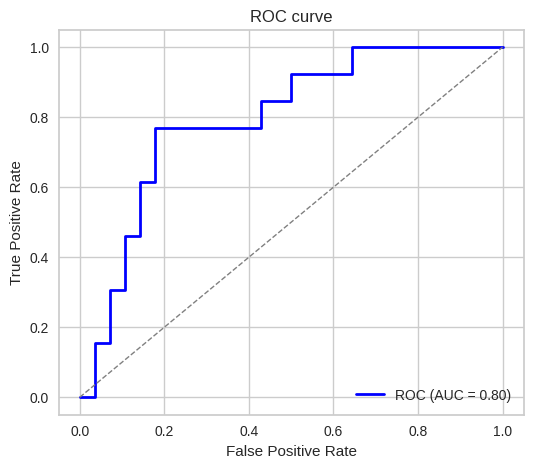

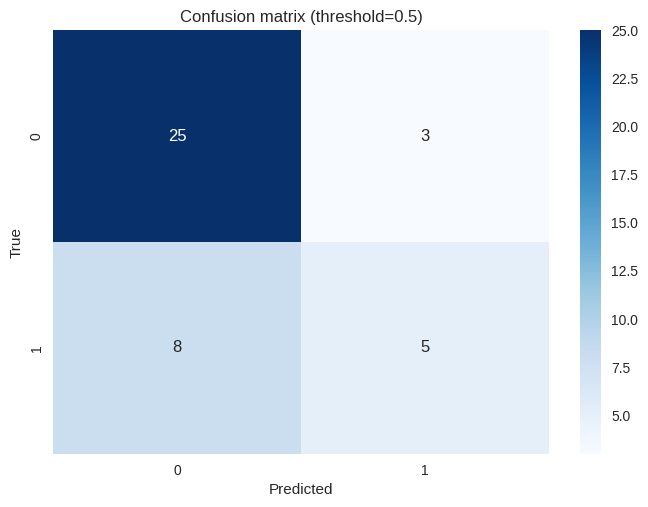

Sensitivity: 0.3846
Specificity: 0.8929
Accuracy: 0.7317%
Preparation of a new explainer is initiated

  -> data              : 401 rows 15 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 401 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x793ab55c1e40> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.0159, mean = 0.315, max = 0.984
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.755, mean = 0.0063, max = 0.908
  -> model_info        : package sklearn

A new explainer has been created!


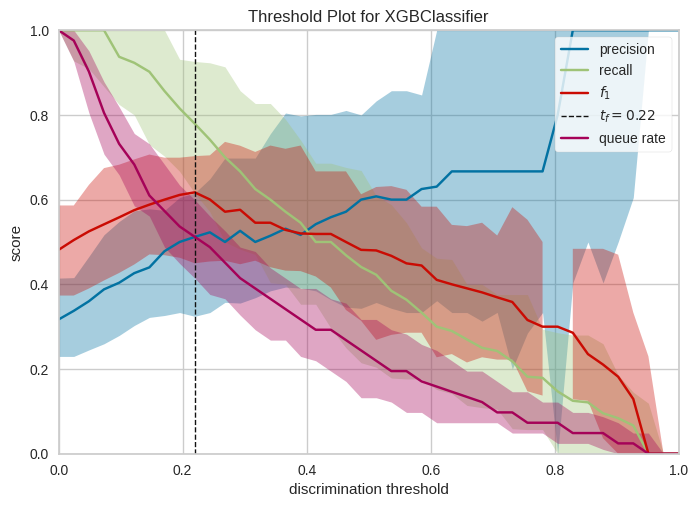

In [15]:
X = df[numerical_cols + categorical_cols]
y = df['EPE RP']

param_grid = {
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__n_estimators': [200, 400, 800],
    'classifier__max_depth': [3, 6, 9],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0],
    'classifier__gamma': [0, 0.1, 0.2]
}

model = XGBClassifier(random_state=2)
#brier score and tuning test split = 0.1
y_true, y_pred, y_pred_probs, false_positive_rate, true_positive_rate, total_roc_auc, trained_model, best_params = train_and_evaluate_model(model, X, y, numerical_cols, categorical_cols, n_folds=5, tune_params=True, param_grid=param_grid, tuning_scoring='neg_brier_score', tuning_test_size=0.1)
untrained_model = model.set_params(**best_params)

plot_roc(false_positive_rate, true_positive_rate, total_roc_auc)
plot_confusion_matrix(y_true, y_pred)
plot_feature_importances(trained_model, X, y)
plot_discrimination_threshold(untrained_model, X, y)

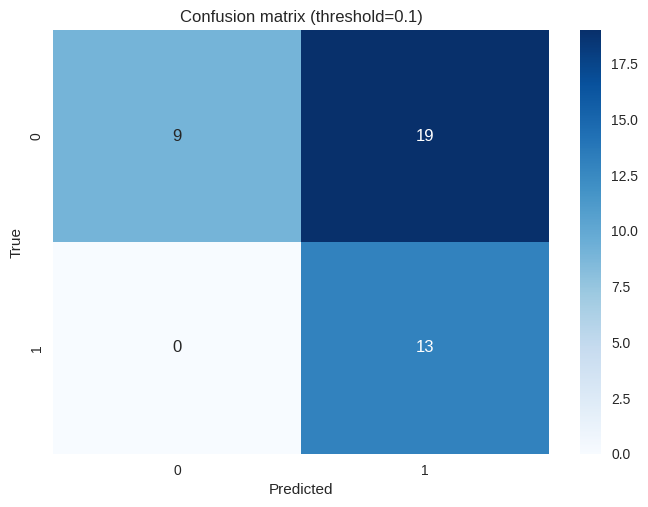

Sensitivity: 1.0000
Specificity: 0.3214
Accuracy: 0.5366%


In [20]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.1)

# SMOTE on EPE macro (for sure sth is incorrect)

Tuning hyperparameters...



Best hyperparameters: {'classifier__colsample_bytree': 0.9, 'classifier__gamma': 0, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 6, 'classifier__n_estimators': 800, 'classifier__subsample': 1.0}
Best neg_brier_score score: -0.017855370944735396

Model hyperparameters after tuning: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.9, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': 0, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.2, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 800, 'n_jobs': None, 'num_parallel_t

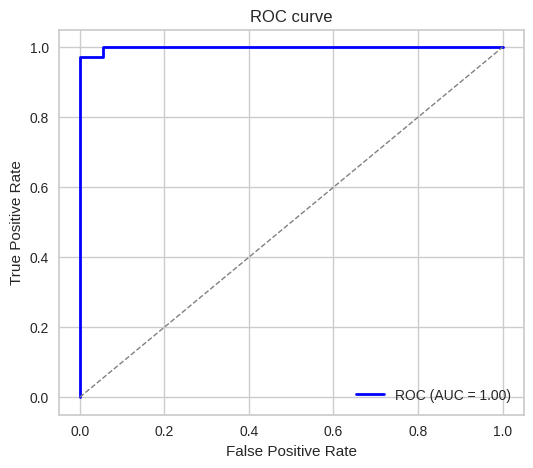

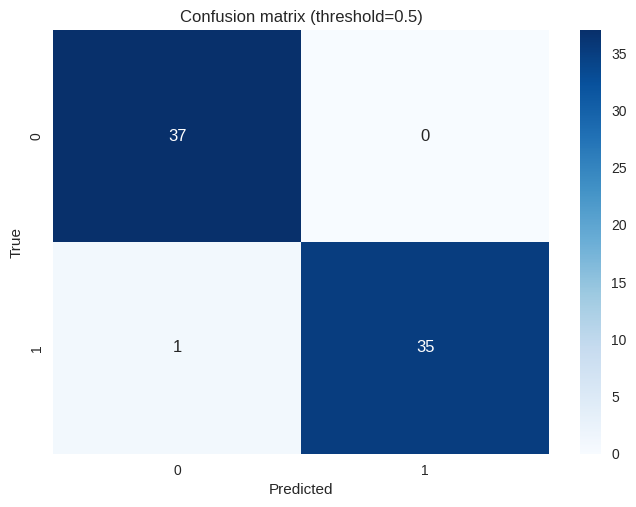

Preparation of a new explainer is initiated

  -> data              : 401 rows 15 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 401 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7da5aca99da0> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 4.34e-05, mean = 0.0911, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.209, mean = 0.00113, max = 0.907
  -> model_info        : package sklearn

A new explainer has been created!


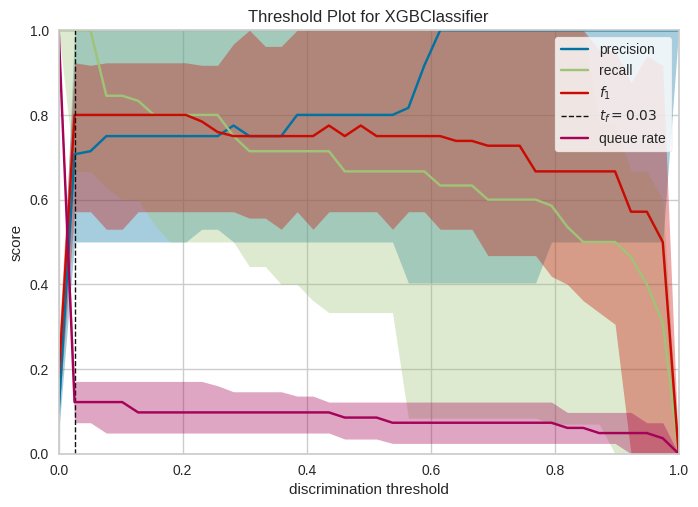

In [62]:
model = XGBClassifier(random_state=2)
X = df[numerical_cols + categorical_cols]
y = df['EPE macro']

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
])
cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
])
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
])

preprocessor.fit(X)
X_imputed = preprocessor.transform(X)
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_imputed, y)
X_smote_df = pd.DataFrame(X_smote, columns=numerical_cols + categorical_cols)

param_grid = {
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__n_estimators': [200, 400, 800],
    'classifier__max_depth': [3, 6, 9],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__colsample_bytree': [0.8, 0.9, 1.0],
    'classifier__gamma': [0, 0.1, 0.2]
}

#brier score and tuning test split = 0.1
y_true, y_pred, y_pred_probs, false_positive_rate, true_positive_rate, total_roc_auc, trained_model, best_params = train_and_evaluate_model(
    model, X_smote_df, y_smote, numerical_cols, categorical_cols, n_folds=5, tune_params=True, param_grid=param_grid, tuning_scoring='neg_brier_score', tuning_test_size=0.1
    )
untrained_model = model.set_params(**best_params)

plot_roc(false_positive_rate, true_positive_rate, total_roc_auc)
plot_confusion_matrix(y_true, y_pred)
plot_feature_importances(trained_model, X, y)
plot_discrimination_threshold(untrained_model, X, y)

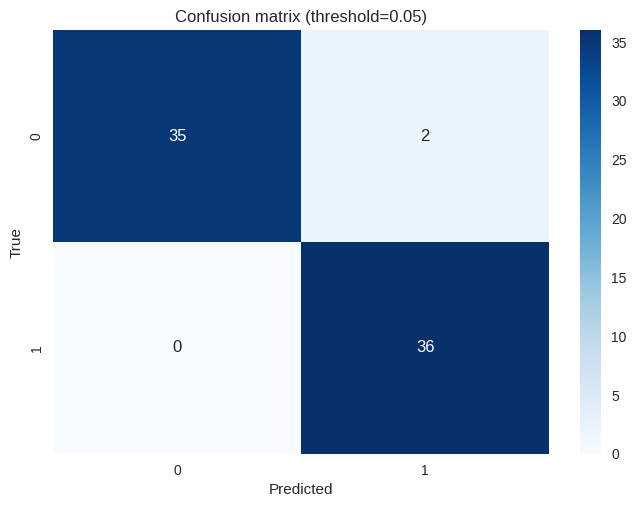

In [67]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.05)